## Imports

In [1]:
import pandas as pd
import numpy as np

## Reading the data.

In [2]:
data = pd.read_csv('datasets/adult-train.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,ooccupation,relationship,race,sex,capital-gain,capital-loss,hours-per-weeek,native-country,income-bucket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocessing the data

#### Replacing invalid characters

In [3]:
data = data.replace(" ?", np.nan)
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,ooccupation,relationship,race,sex,capital-gain,capital-loss,hours-per-weeek,native-country,income-bucket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-weeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.isna().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education-num         0
marital-status        0
ooccupation        1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-weeek       0
native-country      583
income-bucket         0
dtype: int64

#### Replace missing values - for categorical: most_frequent_category

In [6]:
categorical_columns = ['workclass', 'ooccupation', 'native-country']

for col in categorical_columns:
    most_frequent_category=data[col].mode()[0]
    print("Imputing missing values in column "+col+" with the most_frequent_category: "+most_frequent_category)
    # replace nan values with most occured category
    data[col].fillna(most_frequent_category,inplace=True)

Imputing missing values in column workclass with the most_frequent_category:  Private
Imputing missing values in column ooccupation with the most_frequent_category:  Prof-specialty
Imputing missing values in column native-country with the most_frequent_category:  United-States


In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
ooccupation        0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-weeek    0
native-country     0
income-bucket      0
dtype: int64

In [8]:
data.shape

(32561, 15)

In [9]:
categorical_columns = ['workclass', 'education', 'marital-status', 'ooccupation', 'relationship', 'race', 'native-country', 'income-bucket']

for col in categorical_columns:
    print(col, ':', len(data[col].unique()), "unique labels")

workclass : 8 unique labels
education : 16 unique labels
marital-status : 7 unique labels
ooccupation : 14 unique labels
relationship : 6 unique labels
race : 5 unique labels
native-country : 41 unique labels
income-bucket : 2 unique labels


## Encoding categorical variables

In [10]:
y = data['income-bucket']
X = data.drop(columns = ['income-bucket'], axis=1)

#### split into train and test

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe_columns = ['workclass', 'education', 'marital-status', 'ooccupation', 'relationship', 'race', 'native-country']
# ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
# X_train = ct.fit_transform(X_train)

#### start encoding on data set

In [12]:
# creating instance of one-hot-encoder
X_enc_df = pd.get_dummies(X)

In [13]:
X_enc_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-weeek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc_df, y_enc, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22792, 105) (9769, 105) (22792,) (9769,)


## Training on XGBoost

In [18]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred = xgb_cl.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Model Evaluation

#### train accuracy

In [22]:
y_pred_train = xgb_cl.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred_train, y_train)

0.9058441558441559

#### train accuracy confusion matrix

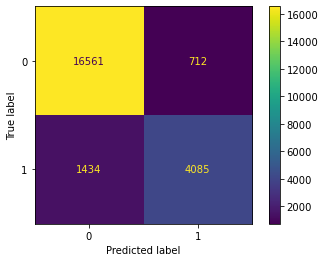

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(xgb_cl, X_train, y_train)

#### train accuracy auc curve

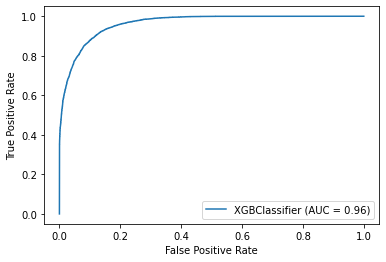

In [30]:
plot_roc_curve(xgb_cl, X_train, y_train)

#### test accuracy

In [31]:
accuracy_score(y_test, y_pred)

0.8738867847271983

####  test accuracy confusion matrix

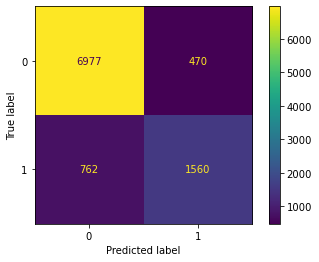

In [32]:
plot_confusion_matrix(xgb_cl, X_test, y_test)

#### test accuracy auc curve

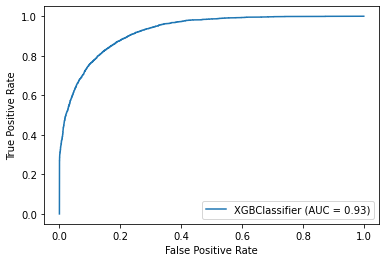

In [35]:
plot_roc_curve(xgb_cl, X_test, y_test)